# Order Delivery Time Prediction PRANAV JADHAV


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from scipy.stats import zscore

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r"C:\Users\JADHAV\Desktop\Upgrad_Assignment\Delivery_Starter\porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df_copy = df.copy() # created copy of the dataframe

df_copy["created_at"] = pd.to_datetime(df_copy["created_at"], errors='coerce')
df_copy["actual_delivery_time"]= pd.to_datetime(df_copy["actual_delivery_time"], errors='coerce')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [6]:
# Convert categorical features to category type
for col in ['market_id','store_primary_category','order_protocol']:
    df_copy[col] = df_copy[col].astype('category')

# Confirm the changes
df_copy.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [7]:
df["order_protocol"].value_counts()

1.0    48404
3.0    47125
5.0    41415
2.0    20890
4.0    17246
6.0      678
7.0       19
Name: order_protocol, dtype: int64

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
df_copy["time_taken"] = (df_copy["actual_delivery_time"] - df_copy["created_at"]).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [9]:
# Extract the hour and day of week from the 'created_at' timestamp
df_copy["hour"] = df_copy["created_at"].dt.hour
df_copy["Weekday"] = df_copy["created_at"].dt.weekday

# Create a categorical feature 'isWeekend'
df_copy["isWeekend"] = df_copy["Weekday"].apply(lambda x: 1 if x in (5,6) else 0 )


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [11]:
# Drop unnecessary columns
df_copy.drop(["created_at", "actual_delivery_time","Weekday"], axis = 1, inplace = True)

In [12]:
df_copy.time_taken.dtype

dtype('float64')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
# Define target variable (y) and features (X)
y = df_copy["time_taken"]
x = df_copy.drop("time_taken", axis =1)


In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  hour                      175777 non-null  int64   
 13  isWeekend                 175

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [15]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                               y,
                                               test_size = 0.2, 
                                               random_state = 42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_col = ["market_id","store_primary_category", "order_protocol","isWeekend"]
num_col = list((df_copy.drop(cat_col+["time_taken"], axis = 1)).columns)

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

Column total_items


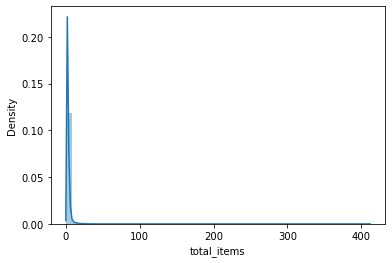

Column subtotal


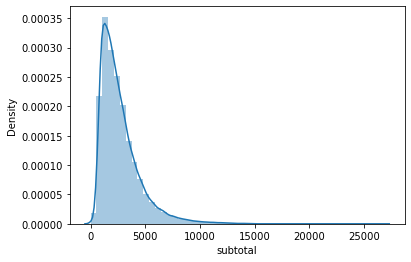

Column num_distinct_items


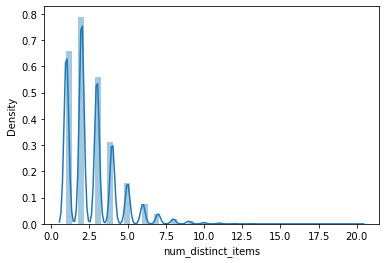

Column min_item_price


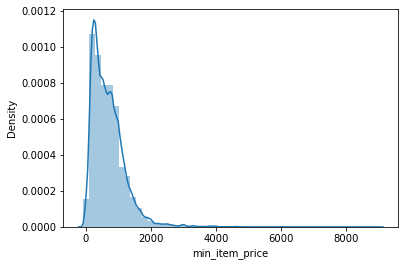

Column max_item_price


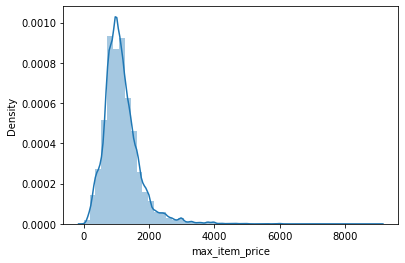

Column total_onshift_dashers


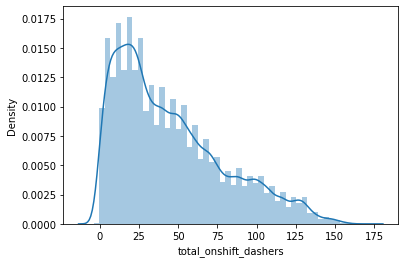

Column total_busy_dashers


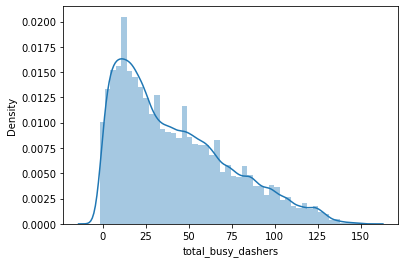

Column total_outstanding_orders


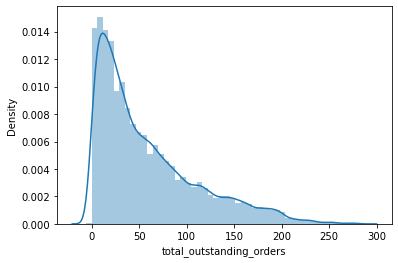

Column distance


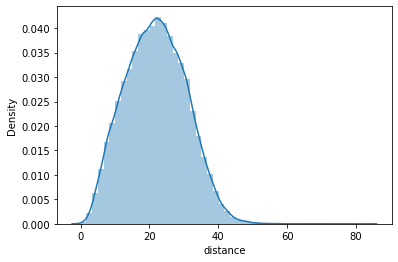

Column hour


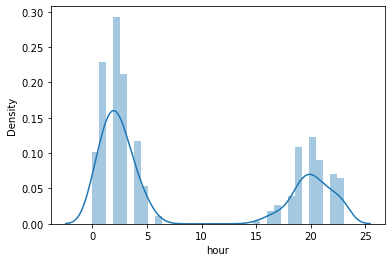

In [17]:
# Plot distributions for all numerical columns
for i in num_col:
    if i != "time_taken":
        print(f"Column {i}")
        sns.distplot(xtrain[i])
        plt.show();
    else:
        pass

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

Column = market_id


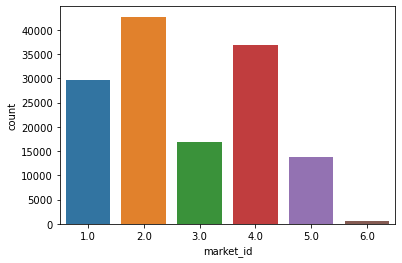

Column = store_primary_category


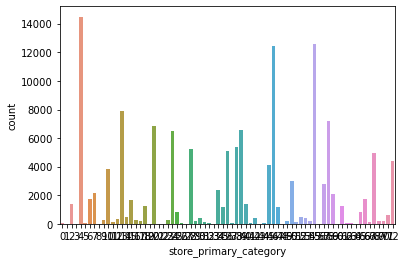

Column = order_protocol


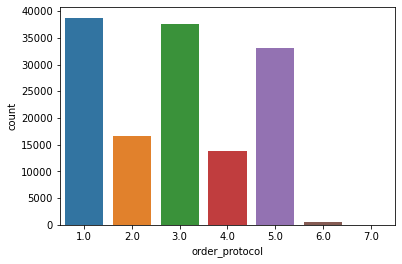

Column = isWeekend


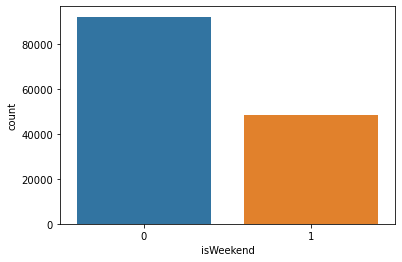

In [18]:
# Distribution of categorical columns

for i in cat_col:
    print(f"Column = {i}")
    sns.countplot(xtrain[i])
    plt.show();
    

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

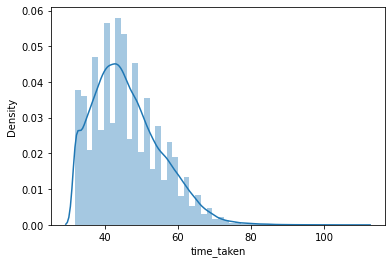

In [19]:
# Distribution of time_taken
sns.distplot(ytrain)
plt.show();



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

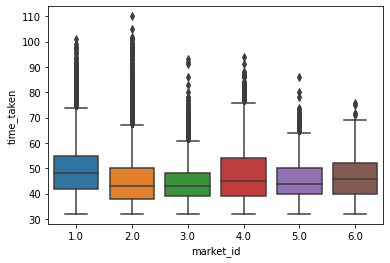

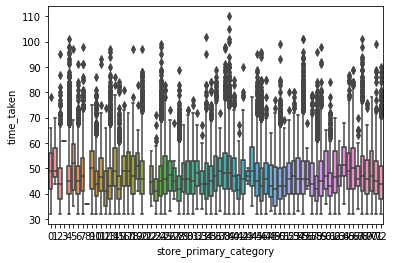

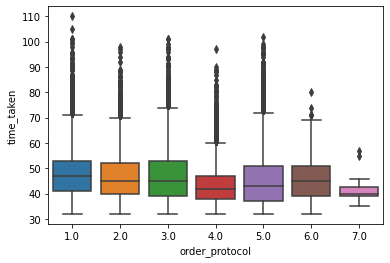

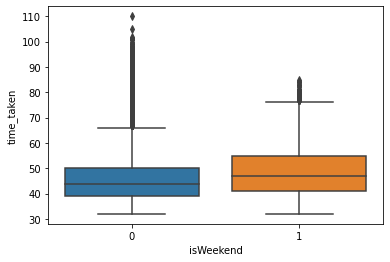

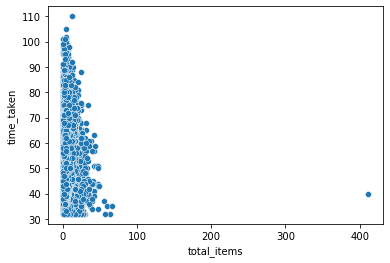

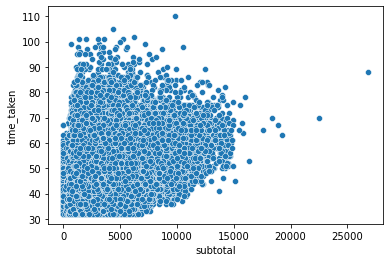

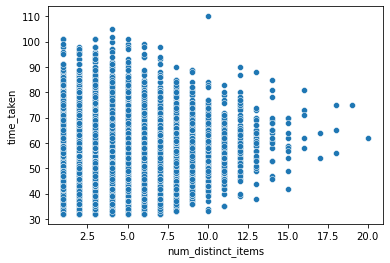

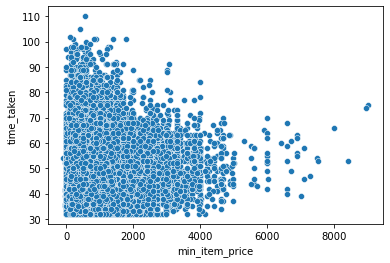

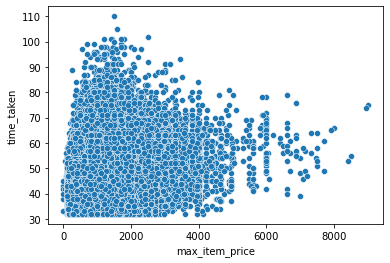

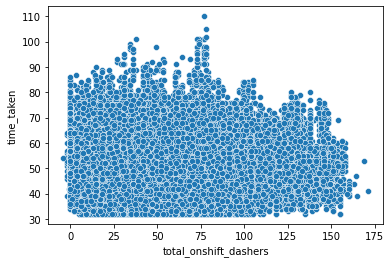

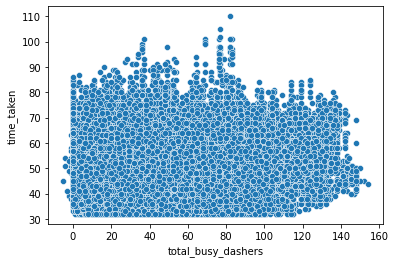

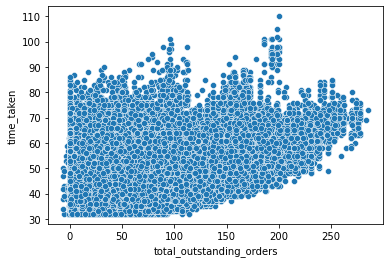

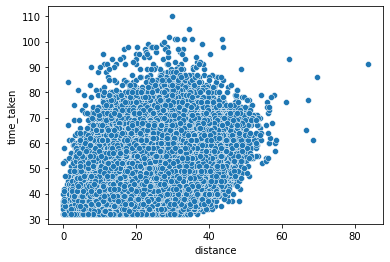

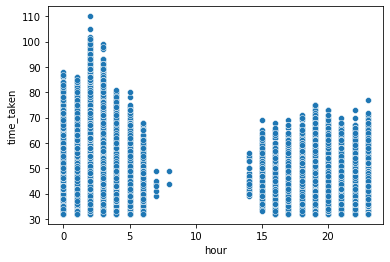

In [20]:
# Scatter plot to visualise the relationship between time_taken and other features
for j in [cat_col, num_col]:
    for i in j:
        if j == cat_col:
            sns.boxplot( x = xtrain[i], y = ytrain)
            plt.show();
        else: 
            if i != "time_taken":
                sns.scatterplot(x = xtrain[i] , y = ytrain)
                plt.show();
            else:
        
                pass


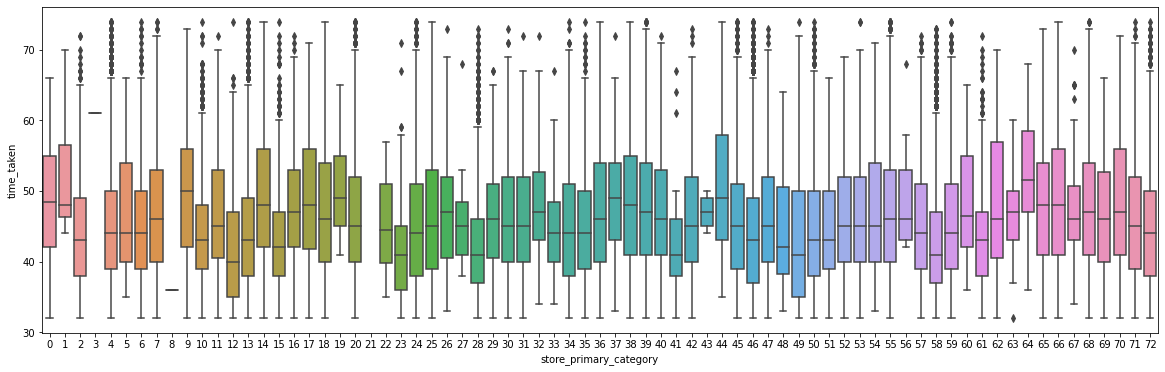

In [69]:
plt.figure(figsize = (20, 6))
sns.boxplot( x = xtrain["store_primary_category"], y = ytrain)
plt.show();

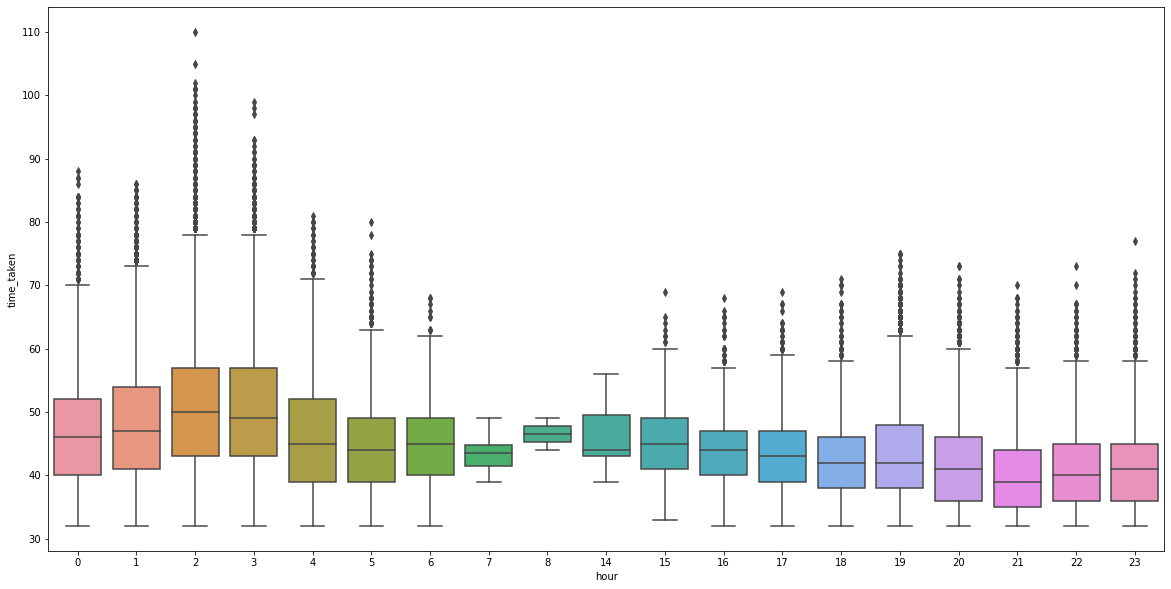

In [21]:
# Show the distribution of time_taken for different hours
plt.figure(figsize = (20, 10))
sns.boxplot( x = xtrain['hour'], y = ytrain)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

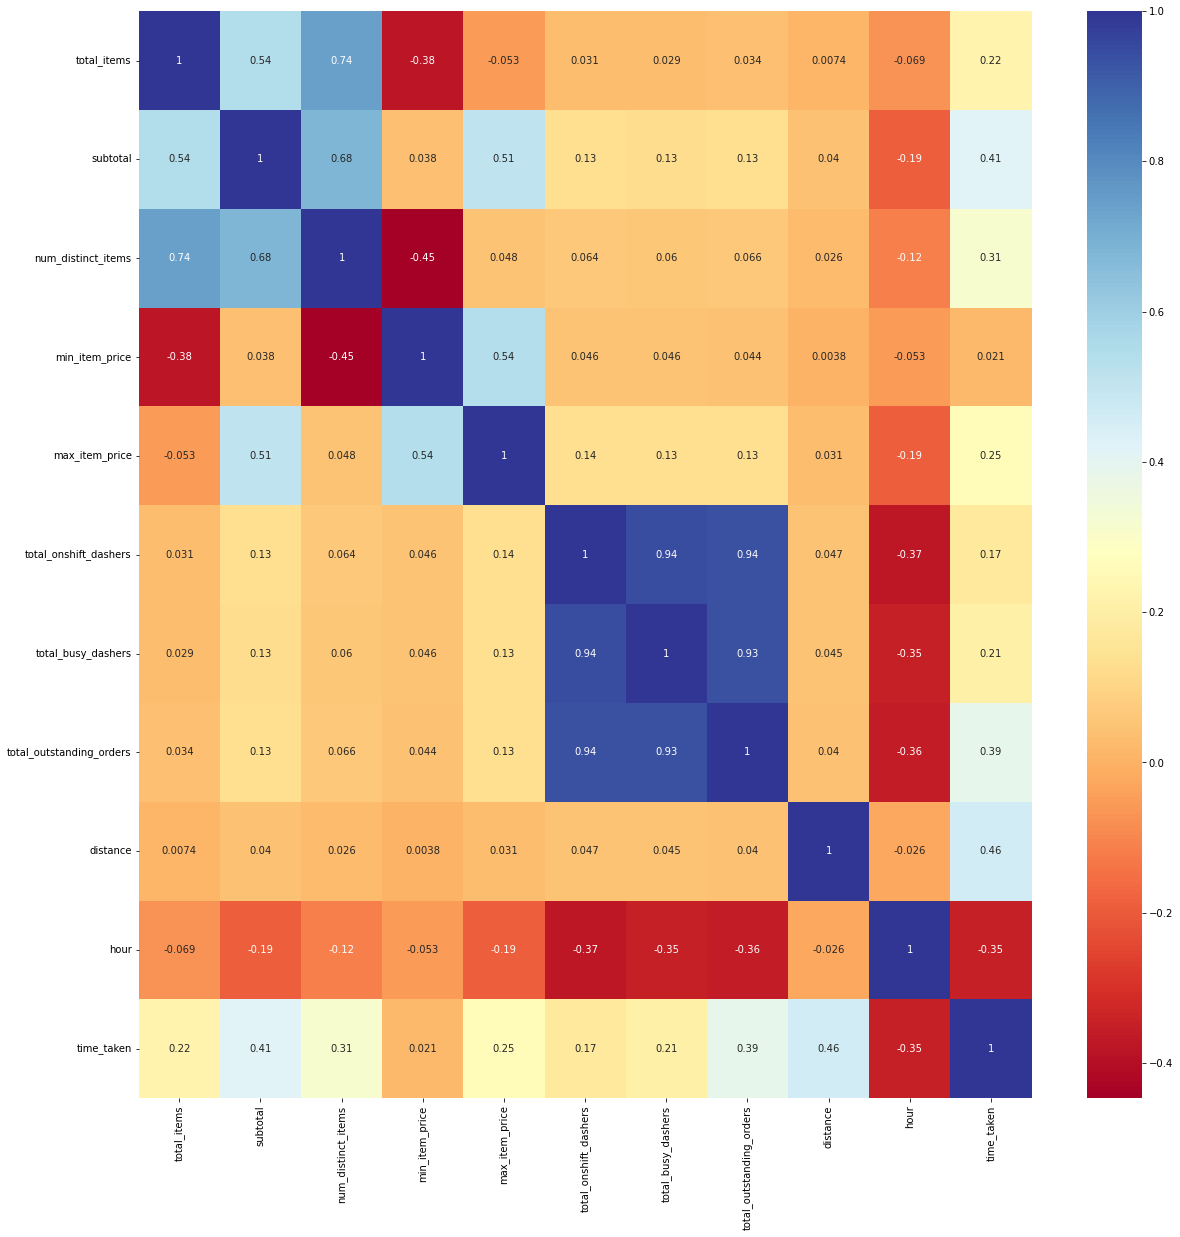

In [22]:
# Plot the heatmap of the correlation matrix
corr_mat = (pd.concat([xtrain[num_col], ytrain], axis = 1)).corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_mat, annot = True, cmap = "RdYlBu")
plt.show();


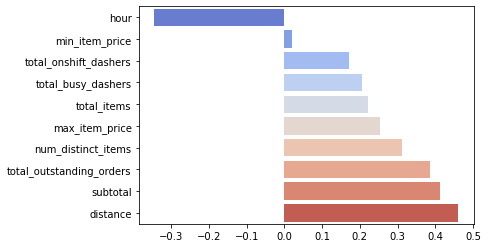

In [23]:
corr_mat2 = xtrain[num_col].corrwith(ytrain)
corr_mat2_sorted = corr_mat2.sort_values()

sns.barplot(x=corr_mat2_sorted.values, y=corr_mat2_sorted.index, palette="coolwarm")
plt.show();

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [24]:
# Drop 3-5 weakly correlated columns from training dataset
# dropping min_item_price, total_onshift_dashers, total_busy_dashers from the xtrain as it has less correlation
# with the time_taken variable

xtrain.drop(['min_item_price', 'total_onshift_dashers', 'total_busy_dashers'], axis = 1 , inplace = True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

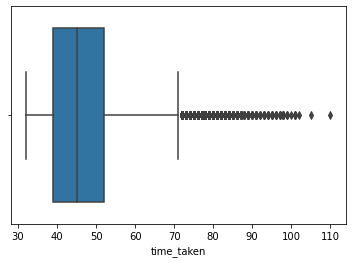

In [25]:
# Boxplot for time_taken
sns.boxplot(ytrain)
plt.show();


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [26]:
xtrain.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   

        num_distinct_items  max_item_price  total_outstanding_orders  \
102712                   1             745                      56.0   
94576                    1             995                     116.0   
49784                    4             895                       7.0   
37753                    2            1399                      19.0   
91728                    1            1320                      52.0   

        distance  hour  isWeekend  
102712     30.32    21          0  
94576      31.16     2          0  
49784      18.16    21          0  
37753      33.44     3          0  
91728      31.56    21          0

In [27]:
# Handle outliers

# defining new num_col 
num_col = (xtrain.select_dtypes(["int64", "float64"])).columns
# combined xtrain and ytrain 
combined_training_df = pd.concat([xtrain[num_col], ytrain], axis = 1)

# Calculate Z-scores
z_scores = combined_training_df.apply(zscore)

#filter rows where all z scores are between -3 and 3 
combined_training_df = combined_training_df[(z_scores <3).all(axis = 1)]

# seperate the features and target
ytrain = combined_training_df["time_taken"]
xtrain[(xtrain.select_dtypes(["int64", "float64"])).columns] = combined_training_df.drop("time_taken", axis = 1)

In [28]:
xtrain.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0          1.0     820.0   
94576        4.0                     20            3.0          1.0     995.0   
49784        1.0                     36            3.0          4.0    2040.0   
37753        3.0                     39            1.0          2.0    2376.0   
91728        2.0                      6            1.0          1.0    1430.0   

        num_distinct_items  max_item_price  total_outstanding_orders  \
102712                 1.0           745.0                      56.0   
94576                  1.0           995.0                     116.0   
49784                  4.0           895.0                       7.0   
37753                  2.0          1399.0                      19.0   
91728                  1.0          1320.0                      52.0   

        distance  hour  isWeekend  
102712     30.32  21.0        0.0  
94576      31.16   2.0        0.0  
49784      18.16  21.0        0.0  
37753      33.44   3.0        0.0  
91728      31.56  21.0        0.0

In [29]:
xtrain.dropna(axis =0, inplace = True)

In [30]:
xtrain.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0          1.0     820.0   
94576        4.0                     20            3.0          1.0     995.0   
49784        1.0                     36            3.0          4.0    2040.0   
37753        3.0                     39            1.0          2.0    2376.0   
91728        2.0                      6            1.0          1.0    1430.0   

        num_distinct_items  max_item_price  total_outstanding_orders  \
102712                 1.0           745.0                      56.0   
94576                  1.0           995.0                     116.0   
49784                  4.0           895.0                       7.0   
37753                  2.0          1399.0                      19.0   
91728                  1.0          1320.0                      52.0   

        distance  hour  isWeekend  
102712     30.32  21.0        0.0  
94576      31.16   2.0        0.0  
49784      18.16  21.0        0.0  
37753      33.44   3.0        0.0  
91728      31.56  21.0        0.0

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [31]:
# Define numerical and categorical columns for easy EDA and data manipulation
val_num_col = (xtest.select_dtypes(["int64","float64"])).columns 
val_cat_col = (xtest.select_dtypes(["category"])).columns

In [32]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35156 entries, 50609 to 49931
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 35156 non-null  category
 1   store_primary_category    35156 non-null  category
 2   order_protocol            35156 non-null  category
 3   total_items               35156 non-null  int64   
 4   subtotal                  35156 non-null  int64   
 5   num_distinct_items        35156 non-null  int64   
 6   min_item_price            35156 non-null  int64   
 7   max_item_price            35156 non-null  int64   
 8   total_onshift_dashers     35156 non-null  float64 
 9   total_busy_dashers        35156 non-null  float64 
 10  total_outstanding_orders  35156 non-null  float64 
 11  distance                  35156 non-null  float64 
 12  hour                      35156 non-null  int64   
 13  isWeekend                 35156 non-null  

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

Column total_items


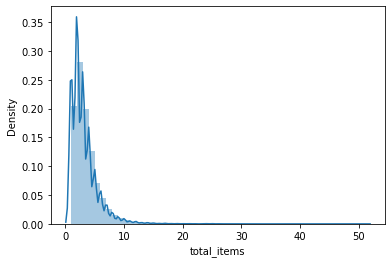

Column subtotal


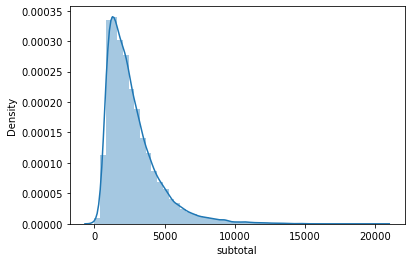

Column num_distinct_items


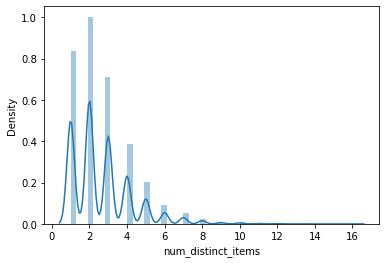

Column min_item_price


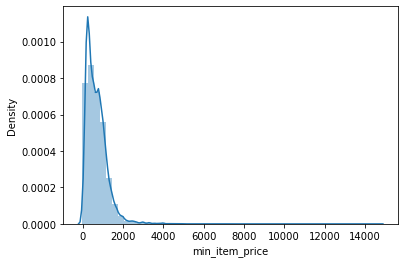

Column max_item_price


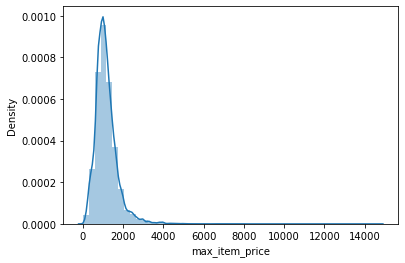

Column total_onshift_dashers


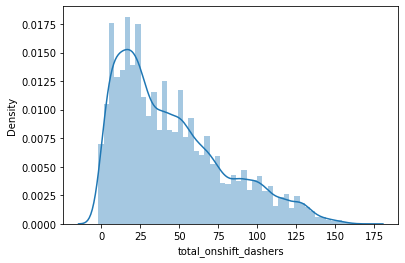

Column total_busy_dashers


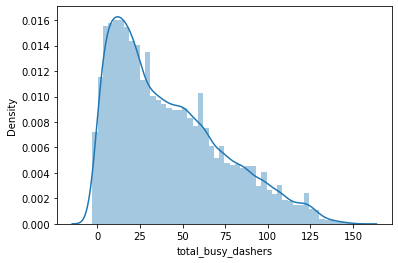

Column total_outstanding_orders


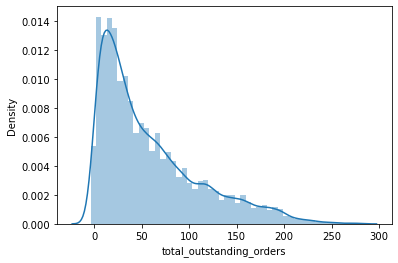

Column distance


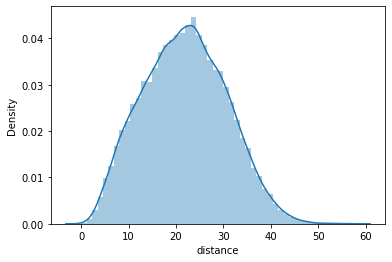

Column hour


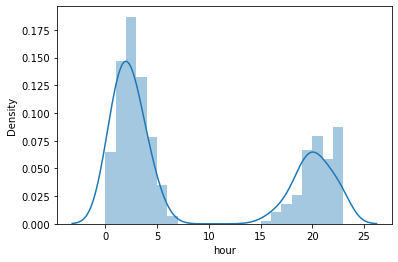

Column isWeekend


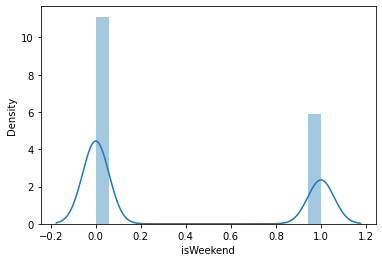

In [33]:
# Plot distributions for all numerical columns

for i in val_num_col:

    print(f"Column {i}")
    sns.distplot(xtest[i])
    plt.show();

##### **4.1.2**
Check the distribution of categorical features

Column = market_id


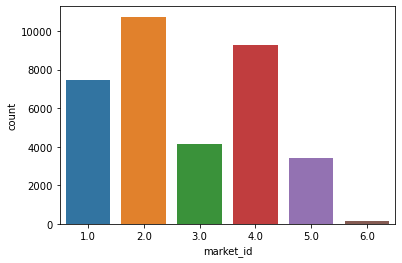

Column = store_primary_category


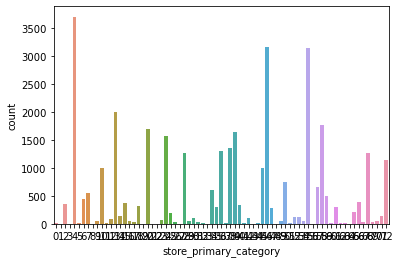

Column = order_protocol


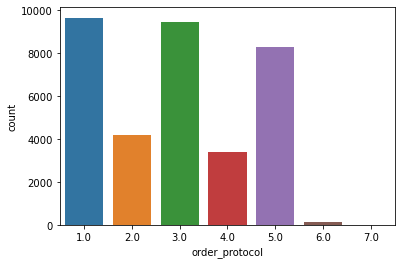

In [34]:
# Distribution of categorical columns

for i in val_cat_col:
    print(f"Column = {i}")
    sns.countplot(xtest[i])
    plt.show();
    

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

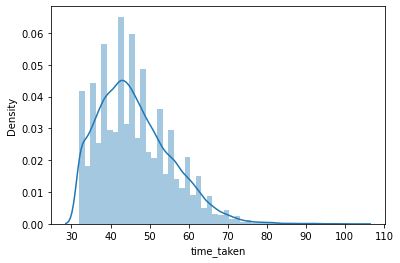

In [35]:
# Distribution of time_taken
sns.distplot(ytest)
plt.show();


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

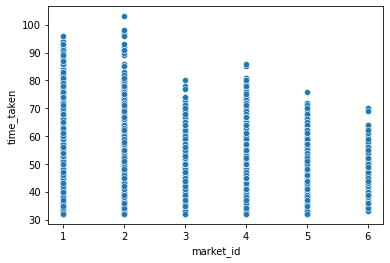

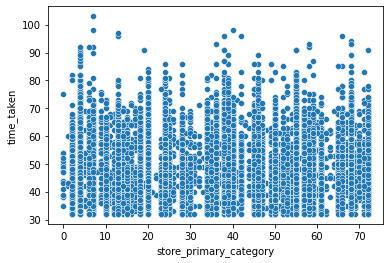

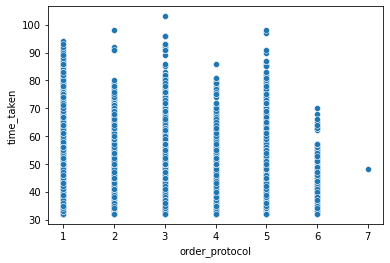

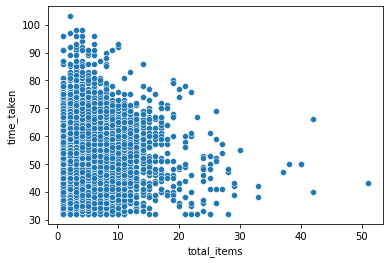

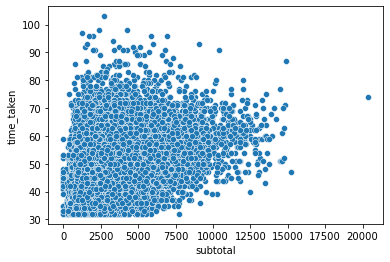

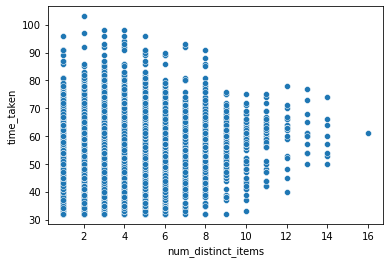

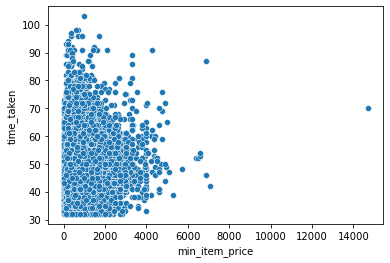

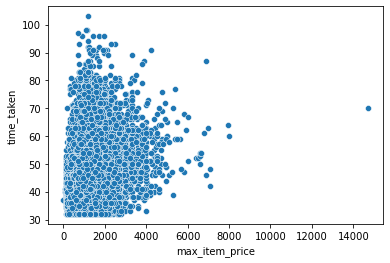

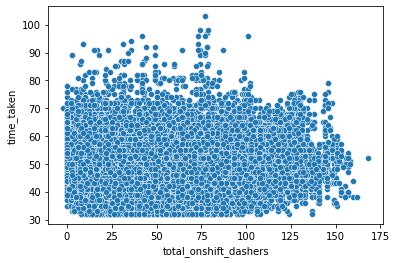

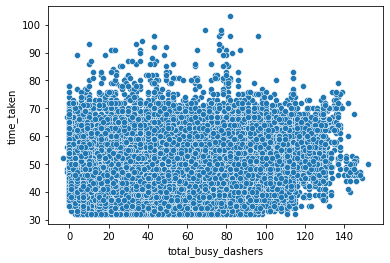

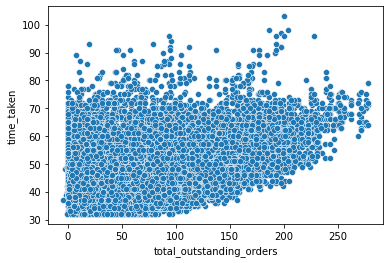

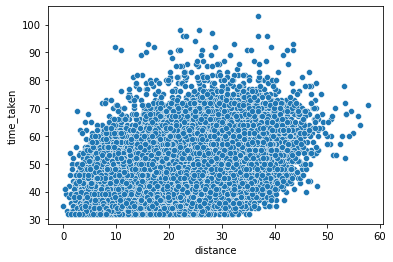

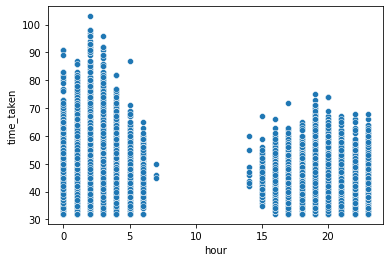

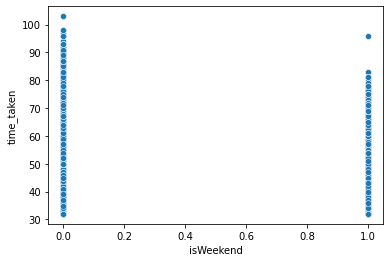

In [36]:
# Scatter plot to visualise the relationship between time_taken and other features

for i in xtest.columns:
    sns.scatterplot(x = xtest[i] , y = ytest)
    plt.show();


#### **4.3** Drop the columns with weak correlations with the target variable

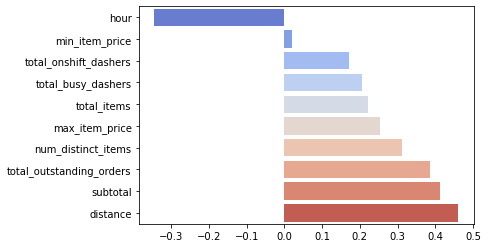

In [37]:
# Drop the weakly correlated columns from training dataset

corr_mat_val = xtest[num_col].corrwith(ytest)
corr_mat_val_sorted = corr_mat2.sort_values()

sns.barplot(x=corr_mat2_sorted.values, y=corr_mat2_sorted.index, palette="coolwarm")
plt.show();

In [38]:
xtest.drop(['min_item_price', 'total_onshift_dashers', 'total_busy_dashers'], axis = 1 , inplace = True)

In [39]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(132092, 11) (35156, 11) (132092,) (35156,)


In [40]:
# define new val_num_col
val_num_col = (xtest.select_dtypes(["int64", "float64"])).columns

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [41]:
# Import libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [42]:
# Apply scaling to the numerical columns
mms = MinMaxScaler()
xtrain[num_col] = mms.fit_transform(xtrain[num_col])
xtest[val_num_col] = mms.transform(xtest[val_num_col])

In [43]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132092 entries, 102712 to 121958
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 132092 non-null  category
 1   store_primary_category    132092 non-null  category
 2   order_protocol            132092 non-null  category
 3   total_items               132092 non-null  float64 
 4   subtotal                  132092 non-null  float64 
 5   num_distinct_items        132092 non-null  float64 
 6   max_item_price            132092 non-null  float64 
 7   total_outstanding_orders  132092 non-null  float64 
 8   distance                  132092 non-null  float64 
 9   hour                      132092 non-null  float64 
 10  isWeekend                 132092 non-null  float64 
dtypes: category(3), float64(8)
memory usage: 9.5 MB


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [44]:
# Create/Initialise the model
lr = LinearRegression()

In [45]:
xtrain.shape, xtest.shape

((132092, 11), (35156, 11))

In [46]:
# Train the model using the training data
lr.fit(xtrain, ytrain)

LinearRegression()

In [47]:
# Make predictions
y_pred = lr.predict(xtrain)

In [48]:
# Find results for evaluation metrics
r2 = r2_score(ytrain, 
             y_pred)
mse = mean_squared_error(ytrain, y_pred)

In [49]:
r2, mse

(0.5186491122520035, 35.80231387762721)

In [50]:
lr.intercept_, lr.coef_

(34.18201652417595,
 array([-6.29499908e-01,  2.27846078e-03, -9.32392932e-01, -3.98921282e-01,
         9.98592107e+00,  3.29510781e+00,  7.42910675e-01,  9.69270791e+00,
         2.16798185e+01, -4.18163359e+00,  1.76374278e+00]))

In [51]:
coefficients = pd.Series(lr.coef_, index=xtrain.columns)
print(coefficients)

market_id                   -0.629500
store_primary_category       0.002278
order_protocol              -0.932393
total_items                 -0.398921
subtotal                     9.985921
num_distinct_items           3.295108
max_item_price               0.742911
total_outstanding_orders     9.692708
distance                    21.679819
hour                        -4.181634
isWeekend                    1.763743
dtype: float64


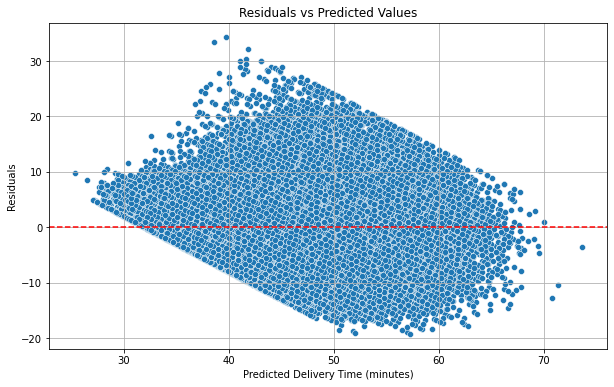

In [52]:
# plotting y preds also y train 
# Calculate residuals
residuals = ytrain - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # reference line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time (minutes)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


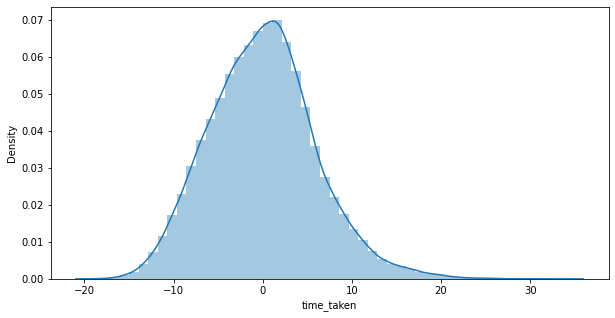

In [53]:
plt.figure(figsize = (10,5))
sns.distplot(residuals)
plt.show();

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [54]:
# Loop through the number of features and test the model
lr_model = LinearRegression()

# result storing
rfe_scores = []


n_test = len(ytest)

# looping through the different number of features
for n in range (1, xtrain.shape[1] +1):
    rfe = RFE (estimator = lr_model, n_features_to_select = n)
    rfe.fit(xtrain, ytrain)
    
    # Transform features
    X_train_rfe = xtrain.loc[:, rfe.support_]
    X_test_rfe = xtest.loc[:, rfe.support_]

    # Fit model and make predictions
    lr_model.fit(X_train_rfe, ytrain)
    y_pred_rfe = lr_model.predict(X_test_rfe)
    
    # Calculate R² score
    r2 = r2_score(ytest, y_pred_rfe)
    
    p = X_test_rfe.shape[1]
    adj_r2 = 1 - (1 - r2) * (n_test - 1) / (n_test - p - 1)
    
    rfe_scores.append((n, r2, adj_r2))

In [55]:
rfe_results = pd.DataFrame(rfe_scores, columns=['Num_Features', 'R2_Score', 'Adjusted_R2'])

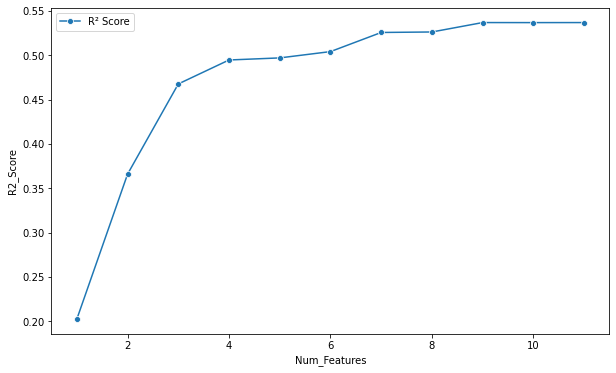

In [56]:
plt.figure(figsize = (10, 6))
sns.lineplot(data= rfe_results, x = "Num_Features", y = "R2_Score", label='R² Score', marker = "o")

plt.show();

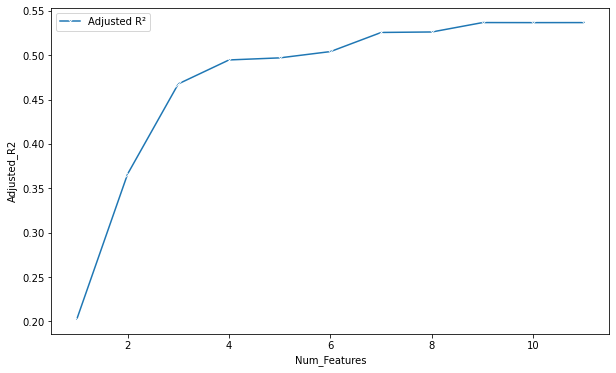

In [57]:
plt.figure(figsize = (10,6))
sns.lineplot(data= rfe_results, x = "Num_Features", y = "Adjusted_R2",label='Adjusted R²', marker = 'x')
plt.show();

In [58]:
RFE_2 = RFE(estimator=lr_model, n_features_to_select= 9) # based on above graph
RFE_2.fit(xtrain, ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [59]:
selected_features= xtrain.columns[RFE_2.support_].tolist()
selected_features

['market_id',
 'order_protocol',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_outstanding_orders',
 'distance',
 'hour',
 'isWeekend']

In [60]:
RFE_2.get_support(True)

array([ 0,  2,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [61]:
xtrain.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance', 'hour', 'isWeekend'],
      dtype='object')

In [62]:
# Build the final model with selected number of features
import statsmodels.api as sm

# Select only the features selected by RFE
X_train_rfe = xtrain[selected_features]

# Add a constant term for the intercept
X_train_rfe_const = sm.add_constant(X_train_rfe)

# Fit the model using statsmodels
model_sm = sm.OLS(ytrain, X_train_rfe_const).fit()

# Display coefficients and p-values
summary = model_sm.summary()
print(summary)



                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                 1.581e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:44:06   Log-Likelihood:            -4.2375e+05
No. Observations:              132092   AIC:                         8.475e+05
Df Residuals:                  132082   BIC:                         8.476e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [63]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Prediction on test data  
# adding constanct 
X_test_sm = sm.add_constant(xtest[selected_features])
# predicting 
ypred = model_sm.predict(X_test_sm)

# Calculate the residuals
residuals = ytest - ypred


[Your inferences here:]



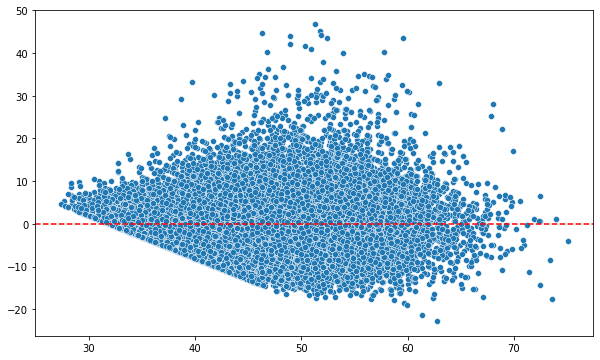

In [65]:
# residual vs predicted

plt.figure(figsize = (10,6))
sns.scatterplot(x = ypred, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.show();

> funnel shape is formed ie. the residuals are tightly packed near 0 and then they are spread out so it is a sign of heteroscedacity as  variance is not constant along the zero line 
Violating the assumption of linear model homoscedacity


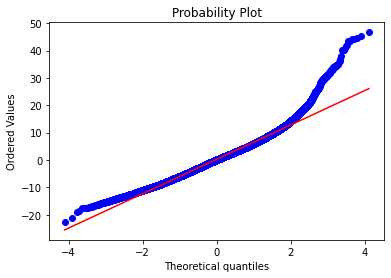

In [66]:
# Q-Q plot 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

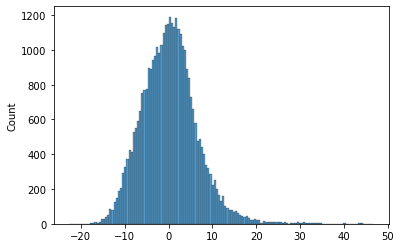

In [67]:
# histogram 
sns.histplot(residuals)
plt.show();

> From above 2 plots we can see that the residuals are slightly normaly distributed, we can see they are slightly Right skewed which mean model is not perfectly align with the assumption of "residuals should be normally distributed"

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes there are 4 categorical variables,
 
> market_id, 

>store_primary_category,

>order_protocol

>is weekend

>for the market_id we dont see as such difference in the median values of the time taken to deliver although 2nd and 4th market_id have higher count of data

>but we do find it in store_primary_category where some restaurants have less median time taken could be considerable
Order_protocol dosent seems to be affecting much as they have similar median time taken except the 7 code may be because of less count of data available

>Orders are mostly placed on weekdays but still the median time taken to deliver the product has slight difference



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> 1. test_size = 0.2 is nothing but the sample size of the population to be considered as a test set
> 2. 0.2 is the stating about 20% of the data should be considered for the test purpose



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the Heatmap, we found the "distance" variable had a highest correlation with the target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> 1. I used ZScore method to detect the outliers
> 2. ZScore indicates that how many standard deviation the particular data point is away from the mean 
> 3. So I considered the 3 as a standard and use it to remove the outliers 



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final Model, 
> marketID, 
> order_protocol & 
> subbtotal are the top 3 freatures significantly affecting the delivery time



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> 1. Linear regression is the supervised learning algorithm use to predict the linear relation between the features and target
>2. There are 2 forms of linear regression 
    a. Simple Linear Regression
        Equation is y = mx +c 
        here we have task to predict  the "y" using only one feature "x" for that we need find 2 values "m" which is slope and "c" which intercept
    b. Multiple linear regression
        Equation is y = c+ m1x1+ m2x2 + m3x3 ... +mnxn
        here we have task to predict the "y" using multiple features "xn" where n = n numbers of features, for that we need to find one intercept "c" and slopes of each and every feature "mn"
> 3. Cost function  is MSE and optimisation is Gradient descent
>4. Assumptions of Linear regression 
>        Linearity: The relationship between predictors and response is linear.

>       Independence: Observations are independent.

>       Homoscedasticity: Constant variance of residuals.

>       Normality: Residuals are normally distributed.

>       No multicollinearity: Independent variables are not highly correlated.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>a. Simple Linear Regression
 Equation is y = mx +c 
 here we have task to predict  the "y" using only one feature "x" for that we need find 2 values "m" which is slope and "c" which intercept
 
>b. Multiple linear regression
 Equation is y = c+ m1x1+ m2x2 + m3x3 ... +mnxn
 here we have task to predict the "y" using multiple features "xn" where n = n numbers of features, for that we need to find one intercept "c" and slopes of each and every feature "mn"



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost function in Linear regression is MSE (Mean Squared Error)
    Mathematically represented as 
        $$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

> The role of the cost function is to tell how wrong the model is as the role of linear regression is to find the best fit line 
> to minimize the cost function we use Gradient Descent as the Optimizer which helps algorithm to find the best parameters (slopes and intercept) so that we get less Mean Squared Error



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>In Overfitting condition the model learns each and every pattern of the data (capturing nosie), it performs well on training data but performs poor on testing data, in simple terms we can say that it is mugging up the data points rather than understanding .

> Where as In Under fitting condition the model is unable to learn any pattern of the data, too simple model, it performs poor on the training data itself and subsequently on testing data 



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> While creating the Linear Regression model we do consider some assumptions like 
    
> 1. the residuals should be normally distributed with mean as 0 
> 2. There should be homoscedacity
> 3. Linearity between features and target 

> They help check whether the assumptions of linear regression are being met.